In [372]:
import numpy as np

In [373]:
import pandas as pd

In [374]:
import seaborn

In [375]:
seaborn.set()

In [376]:
import matplotlib.pylab as plt
%matplotlib inline

In [377]:
from matplotlib.pylab import rcParams

In [378]:
rcParams['figure.figsize'] = 15,6

In [379]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [384]:
data=pd.read_csv("D:/Bitcoin/bitcoin_price_Training - Training.csv")

In [385]:
data.head()

Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000

In [386]:
data.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null object
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [388]:
data.describe()

Open         High          Low        Close
count  1556.000000  1556.000000  1556.000000  1556.000000
mean    582.625328   597.992847   567.851446   584.239396
std     523.137312   542.992855   505.877401   525.904442
min      68.500000    74.560000    65.530000    68.430000
25%     254.287500   260.327500   248.835000   254.320000
50%     438.600000   447.560000   430.570000   438.855000
75%     662.437500   674.525000   646.735000   663.402500
max    2953.220000  2999.910000  2840.530000  2958.110000

In [389]:
data.Volume.count()

1556

In [239]:
data.Open.count()

1556

In [390]:
data=pd.read_csv("D:/Bitcoin/bitcoin_price_Training - Training.csv",index_col="Date")

In [391]:
data.head()

Open     High      Low    Close         Volume  \
Date                                                              
Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

                  Market Cap  
Date                          
Jul 31, 2017  45,535,800,000  
Jul 30, 2017  44,890,700,000  
Jul 29, 2017  46,246,700,000  
Jul 28, 2017  44,144,400,000  
Jul 27, 2017  41,816,500,000

In [392]:
type(data)

pandas.core.frame.DataFrame

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(2)
memory usage: 85.1+ KB


In [394]:
data.describe()

Open         High          Low        Close
count  1556.000000  1556.000000  1556.000000  1556.000000
mean    582.625328   597.992847   567.851446   584.239396
std     523.137312   542.992855   505.877401   525.904442
min      68.500000    74.560000    65.530000    68.430000
25%     254.287500   260.327500   248.835000   254.320000
50%     438.600000   447.560000   430.570000   438.855000
75%     662.437500   674.525000   646.735000   663.402500
max    2953.220000  2999.910000  2840.530000  2958.110000

In [395]:
data.index

Index(['Jul 31, 2017', 'Jul 30, 2017', 'Jul 29, 2017', 'Jul 28, 2017',
       'Jul 27, 2017', 'Jul 26, 2017', 'Jul 25, 2017', 'Jul 24, 2017',
       'Jul 23, 2017', 'Jul 22, 2017',
       ...
       'May 07, 2013', 'May 06, 2013', 'May 05, 2013', 'May 04, 2013',
       'May 03, 2013', 'May 02, 2013', 'May 01, 2013', 'Apr 30, 2013',
       'Apr 29, 2013', 'Apr 28, 2013'],
      dtype='object', name='Date', length=1556)

In [396]:
data.index=pd.to_datetime(data.index)

In [397]:
data.index

DatetimeIndex(['2017-07-31', '2017-07-30', '2017-07-29', '2017-07-28',
               '2017-07-27', '2017-07-26', '2017-07-25', '2017-07-24',
               '2017-07-23', '2017-07-22',
               ...
               '2013-05-07', '2013-05-06', '2013-05-05', '2013-05-04',
               '2013-05-03', '2013-05-02', '2013-05-01', '2013-04-30',
               '2013-04-29', '2013-04-28'],
              dtype='datetime64[ns]', name='Date', length=1556, freq=None)

In [398]:
data.head()

Open     High      Low    Close         Volume      Market Cap
Date                                                                         
2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000  45,535,800,000
2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000  44,890,700,000
2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000  46,246,700,000
2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000  44,144,400,000
2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000  41,816,500,000

In [399]:
data=data.sort_index()

In [400]:
data.head()

Open    High     Low   Close Volume     Market Cap
Date                                                            
2013-04-28  135.30  135.98  132.10  134.21      -  1,500,520,000
2013-04-29  134.44  147.49  134.00  144.54      -  1,491,160,000
2013-04-30  144.00  146.93  134.05  139.00      -  1,597,780,000
2013-05-01  139.00  139.89  107.72  116.99      -  1,542,820,000
2013-05-02  116.38  125.60   92.28  105.21      -  1,292,190,000

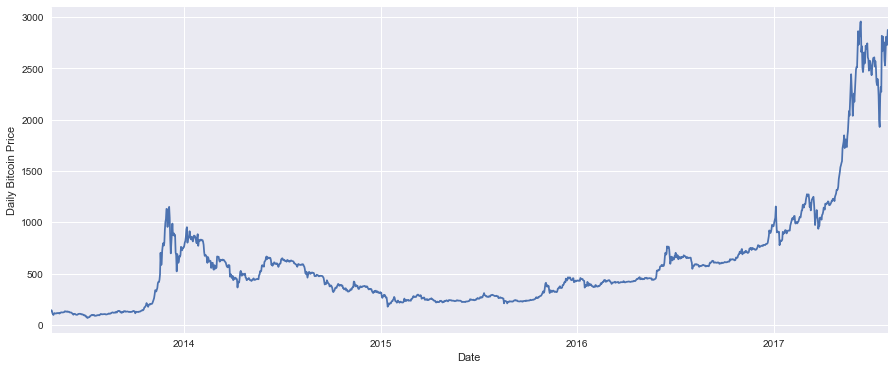

In [251]:
data.Close.plot()
plt.ylabel("Daily Bitcoin Price")

In [252]:
data1=data.Close

In [253]:
weekly=data1.resample("W").sum()

In [254]:
data1.resample("W").mean()

Date
2013-04-28     134.210000
2013-05-05     118.842857
2013-05-12     113.925714
2013-05-19     118.710000
2013-05-26     127.732857
2013-06-02     128.634286
2013-06-09     114.727143
2013-06-16     103.840000
2013-06-23     107.557143
2013-06-30      99.768571
2013-07-07      78.501429
2013-07-14      87.908571
2013-07-21      93.892857
2013-07-28      95.497143
2013-08-04     104.702857
2013-08-11     104.788571
2013-08-18     110.597143
2013-08-25     120.758571
2013-09-01     128.392857
2013-09-08     127.250000
2013-09-15     130.852857
2013-09-22     129.727143
2013-09-29     130.814286
2013-10-06     127.071429
2013-10-13     131.205714
2013-10-20     153.935714
2013-10-27     192.610000
2013-11-03     204.908571
2013-11-10     291.012857
2013-11-17     411.517143
                 ...     
2017-01-15     836.755714
2017-01-22     895.235714
2017-01-29     913.381429
2017-02-05     998.821429
2017-02-12    1021.321429
2017-02-19    1025.515714
2017-02-26    1137.451429
2017-03

In [255]:
weekly.head()

Date
2013-04-28    134.21
2013-05-05    831.90
2013-05-12    797.48
2013-05-19    830.97
2013-05-26    894.13
Freq: W-SUN, Name: Close, dtype: float64

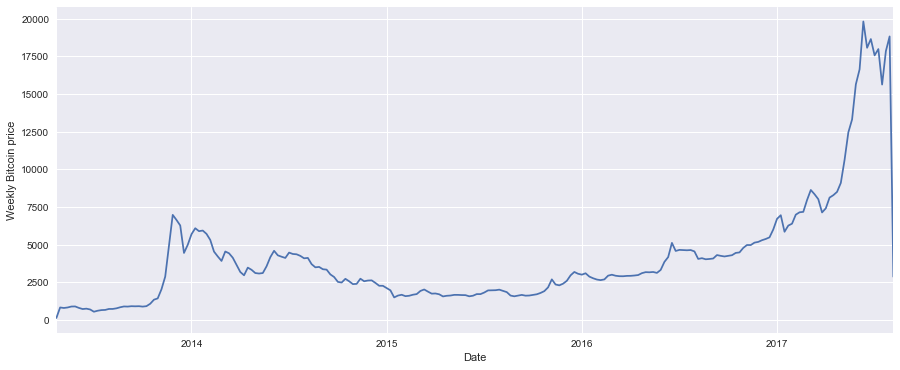

In [256]:
weekly.plot()
plt.ylabel("Weekly Bitcoin price")

In [257]:
by_year=data1.groupby(data1.index.year).mean()

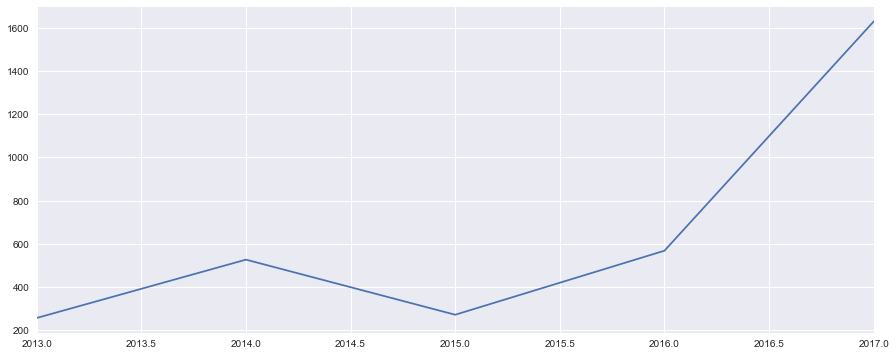

In [258]:
by_year.plot()

In [259]:
a=data1.resample("A").mean()

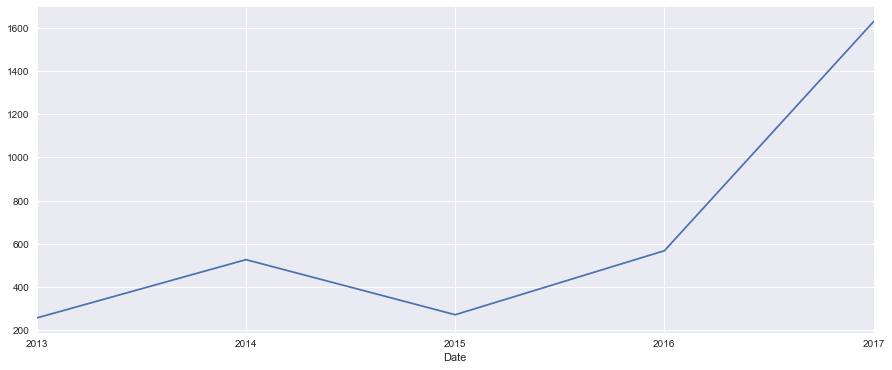

In [260]:
a.plot()

In [261]:
by_weekday=data1.groupby(data.index.dayofweek).sum()

In [262]:
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

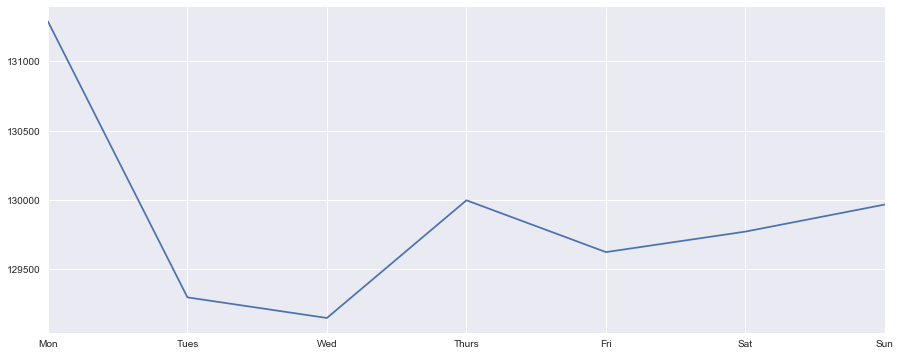

In [263]:
by_weekday.plot()

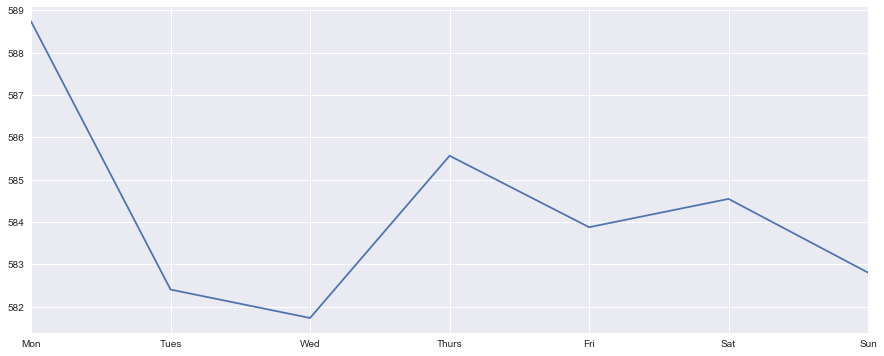

In [264]:
by_weekday = data1.groupby(data1.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

In [265]:
by_day=data1.groupby(data1.index.dayofyear).mean()

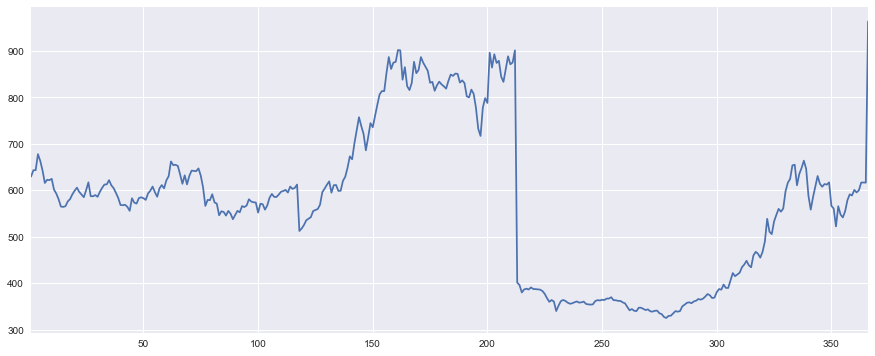

In [266]:
by_day.plot()

In [267]:
by_month=data1.groupby(data1.index.month).mean()

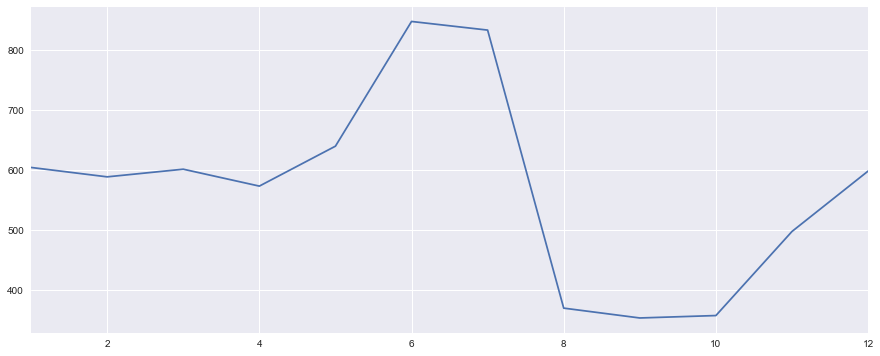

In [268]:
by_month.plot()

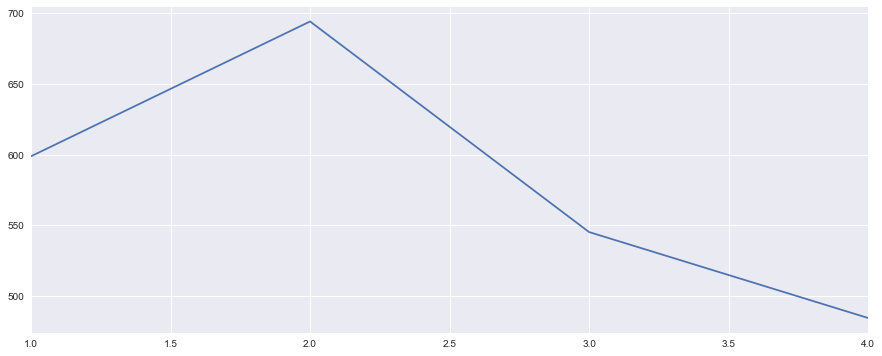

In [269]:
by_quarter = data1.groupby(data1.index.quarter).mean()
by_quarter.plot()

In [270]:
by_quarter=data1.groupby(data1.index.quarter)

1    Axes(0.125,0.2;0.775x0.68)
2    Axes(0.125,0.2;0.775x0.68)
3    Axes(0.125,0.2;0.775x0.68)
4    Axes(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

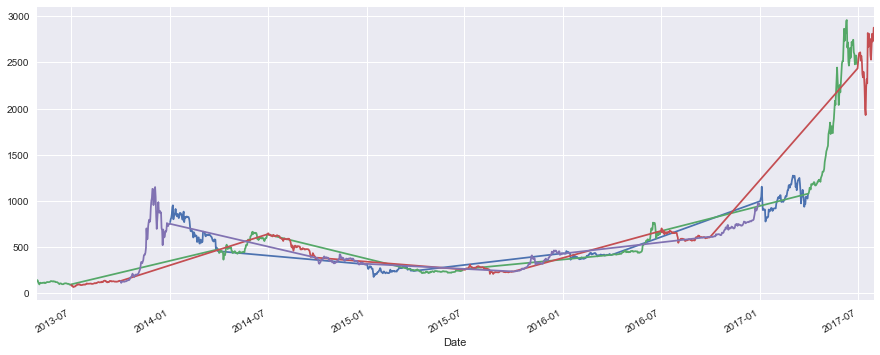

In [271]:
by_quarter.plot()

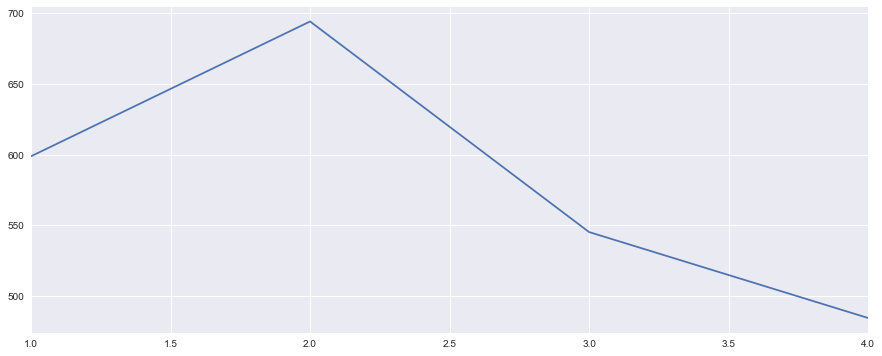

In [272]:
by_quarter_overall = data1.groupby(data1.index.quarter).mean()
by_quarter_overall.plot()

In [273]:
np.where(data1.index.weekday<5,"weekday","weekend")

array(['weekend', 'weekday', 'weekday', ..., 'weekend', 'weekend',
       'weekday'], 
      dtype='<U7')

In [274]:
data1.index.weekday

array([6, 0, 1, ..., 5, 6, 0])

In [275]:
weekend=np.where(data1.index.weekday<5,"weekday","weekend")

In [276]:
weekend

array(['weekend', 'weekday', 'weekday', ..., 'weekend', 'weekend',
       'weekday'], 
      dtype='<U7')

In [277]:
by_time=data1.groupby([weekend, data.index.year]).mean()

In [278]:
by_time

weekday  2013     259.380452
         2014     527.282529
         2015     272.842912
         2016     568.090268
         2017    1631.310397
weekend  2013     252.722958
         2014     527.121538
         2015     271.475385
         2016     569.491048
         2017    1621.967541
Name: Close, dtype: float64

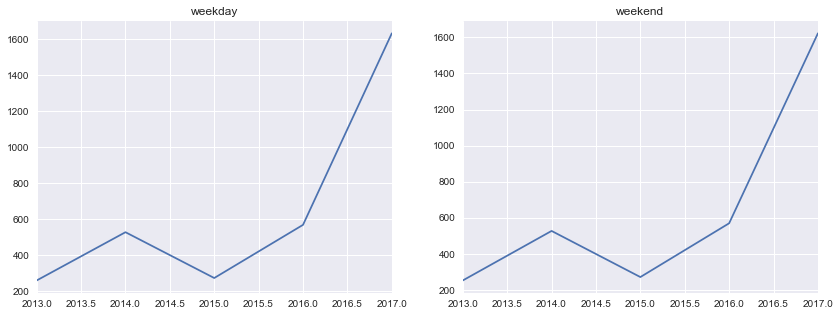

In [279]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['weekday'].plot(ax=ax[0], title='weekday')
by_time.loc['weekend'].plot(ax=ax[1], title='weekend')

In [280]:
ts=data1

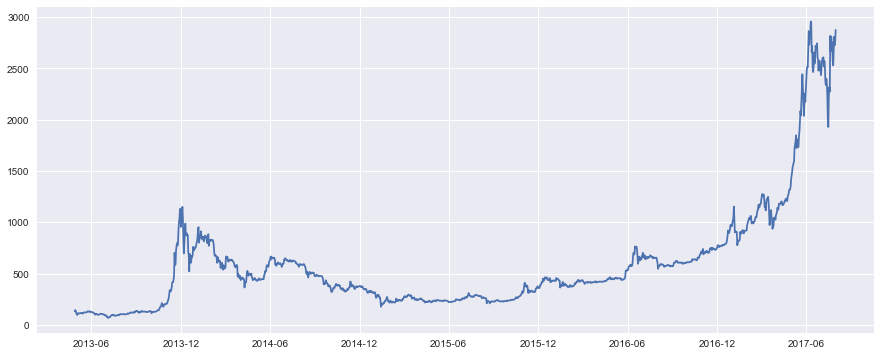

In [281]:
plt.plot(ts)

In [282]:
from statsmodels.tsa.stattools import adfuller

In [283]:
def test_for_stationarity(input_data):
    r_mean=input_data.rolling(window=7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

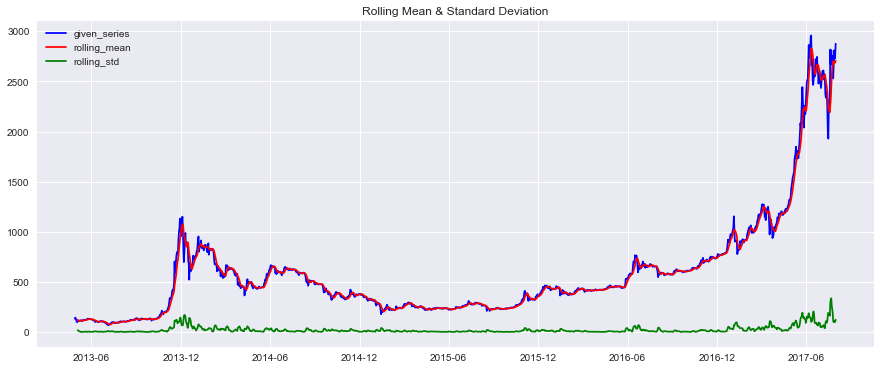

Results of Dickey-Fuller Test:
Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


In [284]:
test_for_stationarity(ts)

In [285]:
adfuller(ts)

(2.535588587388621,
 0.99906043522229249,
 24,
 1531,
 {'1%': -3.4346284441307184,
  '10%': -2.5677760318409732,
  '5%': -2.8634296685793159},
 15393.063847184316)

In [286]:
b=adfuller(ts)

In [287]:
b[4].items()

dict_items([('1%', -3.4346284441307184), ('5%', -2.8634296685793159), ('10%', -2.5677760318409732)])

In [288]:
#to eliminate trend

In [289]:
ts_logtransformed=np.log(ts)

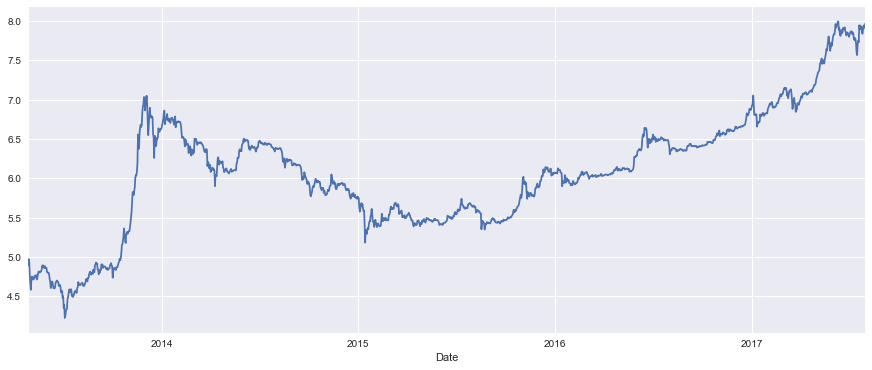

In [290]:
ts_logtransformed.plot()

In [291]:
ts_logtransformed.head()

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
Name: Close, dtype: float64

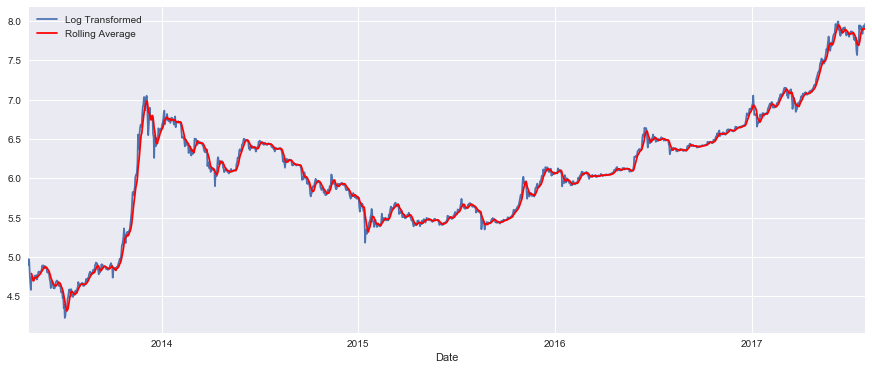

In [292]:
Rolling_average=ts_logtransformed.rolling(window=7,center=False).mean()
ts_logtransformed.plot(label="Log Transformed")
Rolling_average.plot(color="red",label="Rolling Average")
plt.legend()

In [293]:
Rolling_average.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [294]:
log_Rolling_difference = ts_logtransformed - Rolling_average

In [295]:
log_Rolling_difference.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04   -0.067168
2013-05-05   -0.016366
2013-05-06   -0.011951
2013-05-07    0.012392
Name: Close, dtype: float64

In [296]:
log_Rolling_difference.tail(10)

Date
2017-07-22    0.151593
2017-07-23    0.073239
2017-07-24    0.051861
2017-07-25   -0.030130
2017-07-26   -0.063797
2017-07-27   -0.001463
2017-07-28    0.041254
2017-07-29    0.015741
2017-07-30    0.025554
2017-07-31    0.061402
Name: Close, dtype: float64

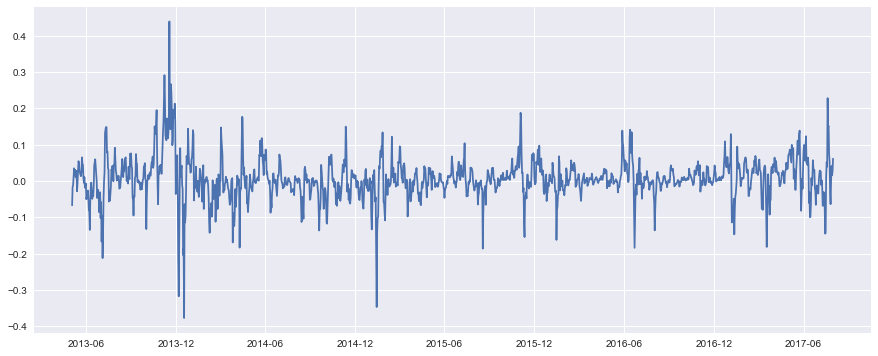

In [297]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

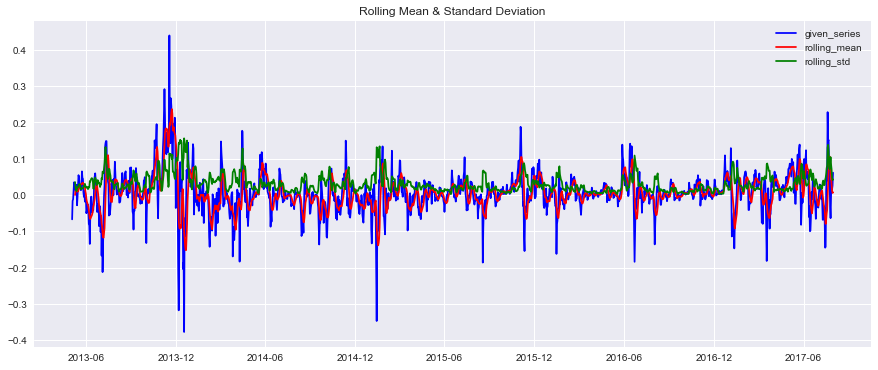

Results of Dickey-Fuller Test:
Test Statistic                -7.191326e+00
p-value                        2.499260e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [298]:
test_for_stationarity(log_Rolling_difference)

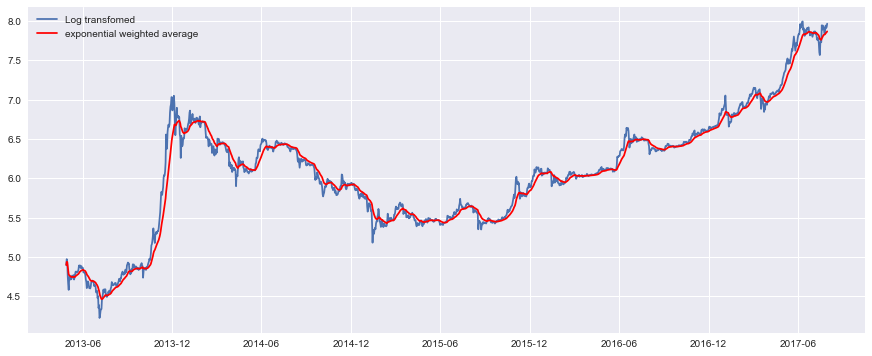

In [299]:
#Exponential weighted moving average
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [300]:
expwighted_avg.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.938315
2013-04-30    4.936906
2013-05-01    4.886513
2013-05-02    4.830850
2013-05-03    4.778564
2013-05-04    4.768079
2013-05-05    4.765448
2013-05-06    4.758372
2013-05-07    4.751720
Name: Close, dtype: float64

In [301]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

In [302]:
log_expmovwt_diff.head()

Date
2013-04-28    0.000000
2013-04-29    0.035241
2013-04-30   -0.002432
2013-05-01   -0.124424
2013-05-02   -0.174892
Name: Close, dtype: float64

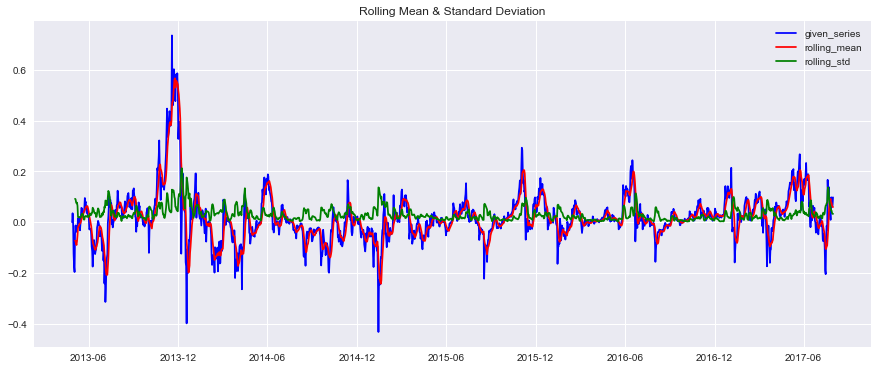

Results of Dickey-Fuller Test:
Test Statistic                   -5.442038
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1532.000000
Critical Value (1%)              -3.434626
Critical Value (5%)              -2.863428
Critical Value (10%)             -2.567775
dtype: float64


In [303]:
test_for_stationarity(log_expmovwt_diff)

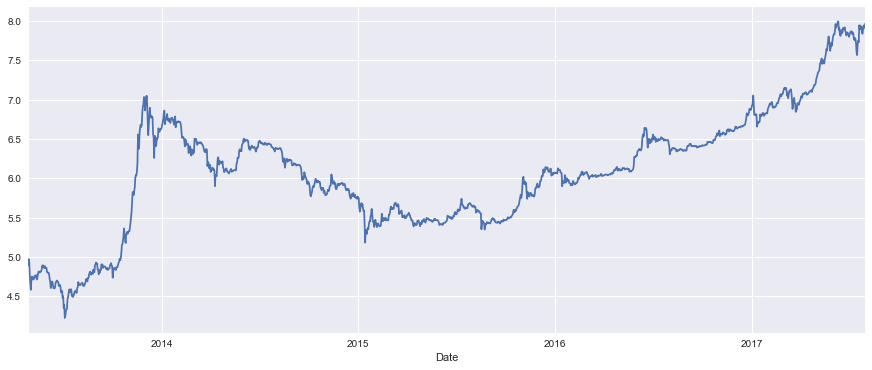

In [304]:
ts_logtransformed.plot()

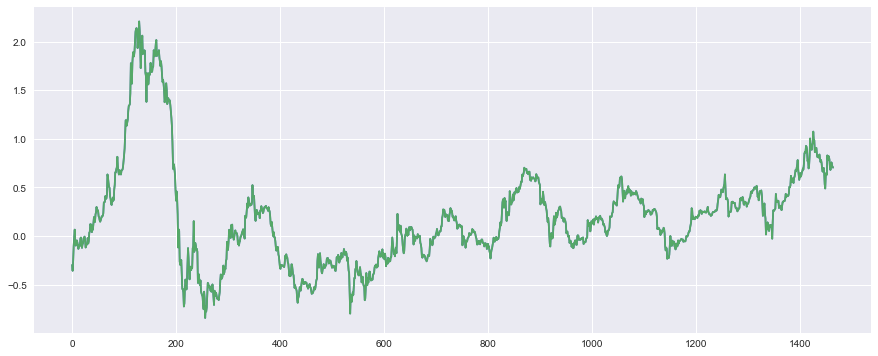

In [305]:
X = ts_logtransformed
diff = list()
days_in_quarter = 91
for i in range(days_in_quarter, len(X)):
   value = X[i] - X[i - days_in_quarter]
   diff.append(value)
plt.plot(diff)
diff = pd.Series(diff)
diff
plt.plot(diff)

In [306]:
ts_logtransformed.shift(7)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05    4.899406
2013-05-06    4.973556
2013-05-07    4.934474
2013-05-08    4.762088
2013-05-09    4.655958
2013-05-10    4.582413
2013-05-11    4.722953
2013-05-12    4.752814
2013-05-13    4.721174
2013-05-14    4.714025
2013-05-15    4.732419
2013-05-16    4.724463
2013-05-17    4.763882
2013-05-18    4.747017
2013-05-19    4.744932
2013-05-20    4.770515
2013-05-21    4.714025
2013-05-22    4.738126
2013-05-23    4.777105
2013-05-24    4.812347
2013-05-25    4.816241
2013-05-26    4.803939
2013-05-27    4.804021
                ...   
2017-07-02    7.859185
2017-07-03    7.815389
2017-07-04    7.844809
2017-07-05    7.853523
2017-07-06    7.839652
2017-07-07    7.816352
2017-07-08    7.797517
2017-07-09    7.826631
2017-07-10    7.849347
2017-07-11    7.863897
2017-07-12    7.864032
2017-07-13    7.866554
2017-0

In [307]:
ts_logtransformed.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
2013-05-03    4.582413
2013-05-04    4.722953
2013-05-05    4.752814
2013-05-06    4.721174
2013-05-07    4.714025
Name: Close, dtype: float64

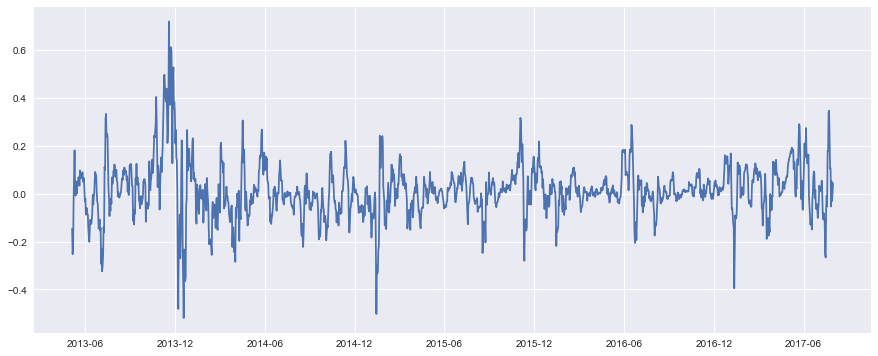

In [308]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)

In [309]:
ts_diff_logtrans.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

In [310]:
ts_diff_logtrans.dropna(inplace=True)

In [311]:
ts_diff_logtrans.head(10)

Date
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
2013-05-08   -0.029669
2013-05-09    0.068505
2013-05-10    0.181469
2013-05-11    0.024064
2013-05-12   -0.007882
2013-05-13    0.049341
2013-05-14    0.000000
Name: Close, dtype: float64

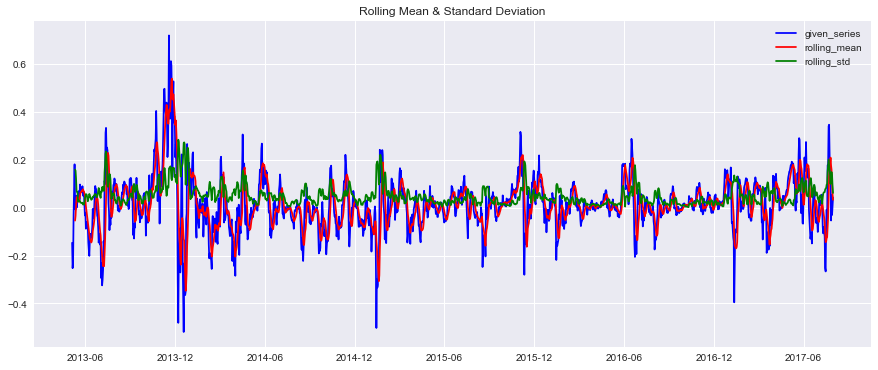

Results of Dickey-Fuller Test:
Test Statistic                -6.523574e+00
p-value                        1.027774e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.525000e+03
Critical Value (1%)           -3.434645e+00
Critical Value (5%)           -2.863437e+00
Critical Value (10%)          -2.567780e+00
dtype: float64


In [312]:
test_for_stationarity(ts_diff_logtrans)

In [313]:
decomposition = seasonal_decompose(ts_logtransformed)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: freq D not understood. Please report if you think this in error.

In [314]:
#Forecasting

In [315]:
#ACF and PACF
lag_acf=acf(ts_diff_logtrans,nlags=30)
lag_pacf=pacf(ts_diff_logtrans,nlags=50,method="ols")

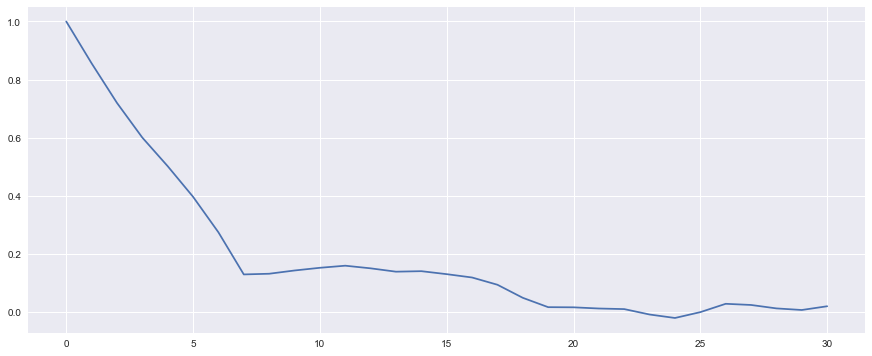

In [316]:
#Plot ACF
plt.plot(lag_acf)

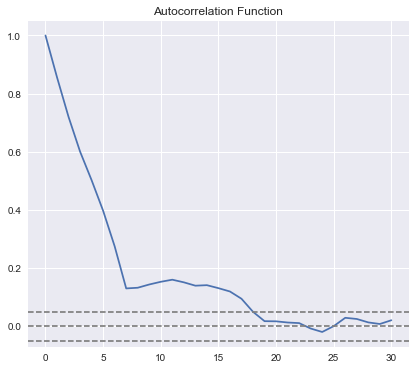

In [317]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

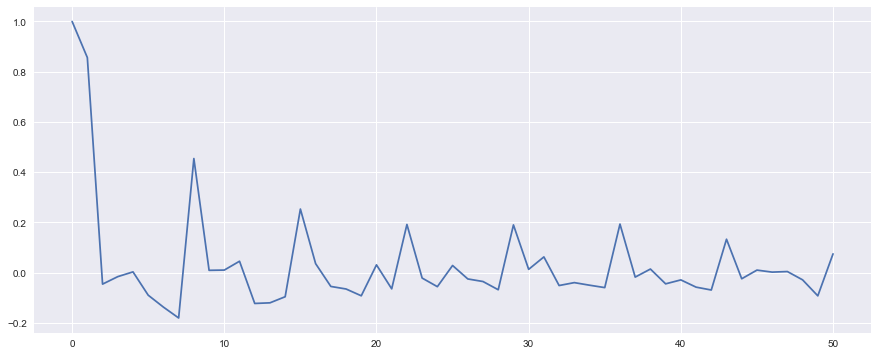

In [318]:
plt.plot(lag_pacf)

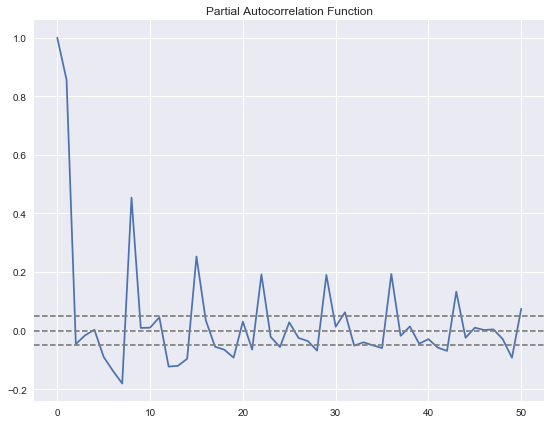

In [319]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

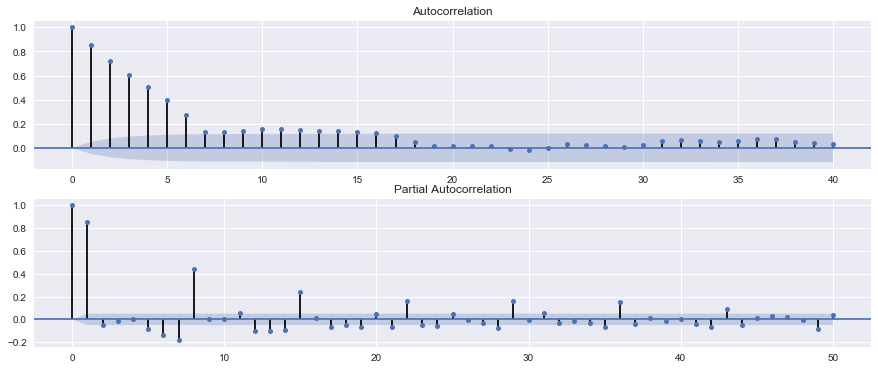

In [320]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [321]:
#Arima model

In [322]:
#AR model
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

In [323]:
model=ARIMA(ts_logtransformed,order=(8,1,0))

In [324]:
results_AR = model.fit()  

In [325]:
results_AR

In [326]:
results_AR.fittedvalues

Date
2013-04-29    0.001953
2013-04-30    0.001905
2013-05-01   -0.001205
2013-05-02    0.002621
2013-05-03    0.014602
2013-05-04    0.009958
2013-05-05   -0.000883
2013-05-06   -0.021980
2013-05-07   -0.026696
2013-05-08    0.003858
2013-05-09    0.009907
2013-05-10    0.015846
2013-05-11    0.002610
2013-05-12   -0.005621
2013-05-13    0.001119
2013-05-14    0.006879
2013-05-15    0.000701
2013-05-16    0.005835
2013-05-17    0.001297
2013-05-18   -0.004364
2013-05-19    0.001751
2013-05-20   -0.000235
2013-05-21    0.008288
2013-05-22    0.008095
2013-05-23    0.002544
2013-05-24   -0.000473
2013-05-25   -0.001140
2013-05-26    0.000254
2013-05-27    0.004203
2013-05-28    0.006511
                ...   
2017-07-02    0.002636
2017-07-03    0.005405
2017-07-04    0.000063
2017-07-05   -0.004008
2017-07-06    0.000058
2017-07-07    0.003352
2017-07-08    0.007101
2017-07-09    0.005781
2017-07-10    0.001827
2017-07-11   -0.000401
2017-07-12    0.004591
2017-07-13   -0.000483
2017-0

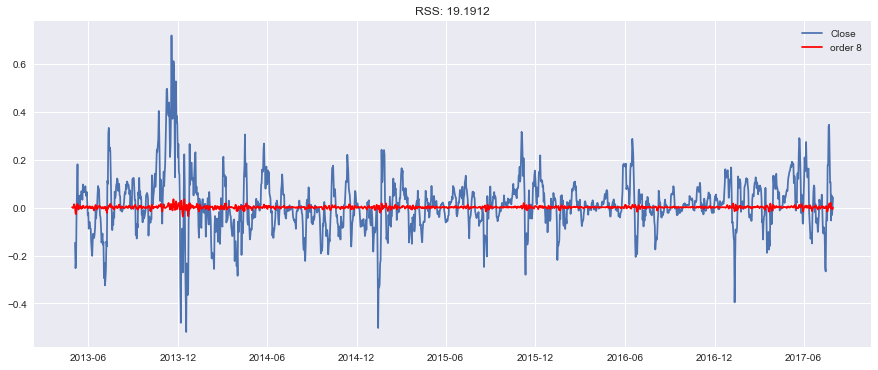

In [327]:
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

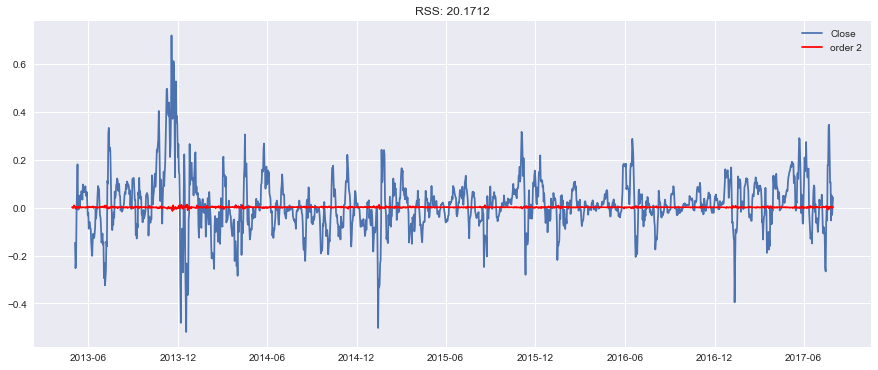

In [328]:
model = ARIMA(ts_logtransformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [329]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 07 Jan 2018   AIC                          -5401.380
Time:                        11:31:09   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.057     -5.37e-05     0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965        -0.051     0.049
ar.L2.D.Close    -0.0435      0.025     -1.715      0.086        -0.093     0.006
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0127           -4.7948j            4.7948           -0.2504
AR.2           -0.0127           +4.7948j            4.7948            0.2504
-----------------------------------------------------------------------------
"""

In [330]:
#MA model

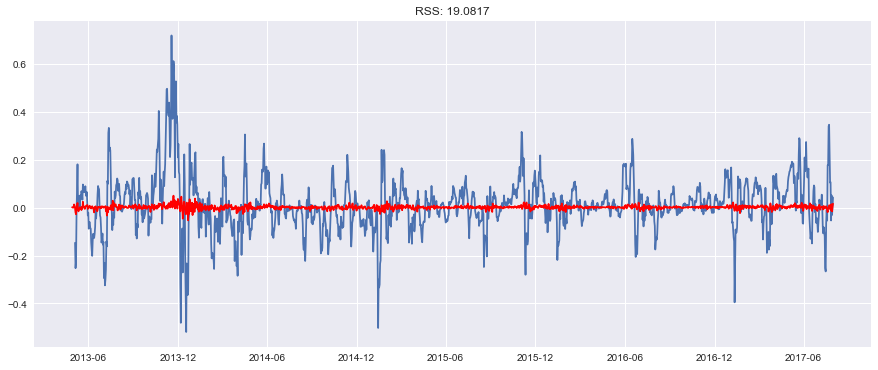

In [331]:
model = ARIMA(ts_logtransformed, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [332]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 07 Jan 2018   AIC                          -5414.646
Time:                        11:32:16   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169        -0.001     0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697        -0.060     0.040
ma.L2.D.Close     -0.0373      0.025     -1.469      0.142        -0.087     0.012
ma.L3.D.Close     -0.0222      0.026     -0.871      0.384        -0.072     0.028
ma.L4.D.Close      0.0759      0.026      2.962      0.003         0.026     0.126
ma.L5.D.Close      0.0271      0.026      1.039      0.299        -0.024     0.078
ma.L6.D.Close      0.0821      0.026      3.142      0.002         0.031     0.133
ma.L7.D.Close     -0.0306      0.027     -1.151      0.250        -0.083     0.022
ma.L8.D.Close     -0.0069      0.026     -0.262      0.793        -0.058     0.045
ma.L9.D.Close     -0.0087      0.027     -0.326      0.745        -0.061     0.043
ma.L10.D.Close     0.0441      0.026      1.685      0.092        -0.007     0.095
ma.L11.D.Close     0.0772      0.025      3.047      0.002         0.028     0.127
ma.L12.D.Close    -0.0106      0.028     -0.381      0.703        -0.065     0.044
ma.L13.D.Close     0.0372      0.025      1.480      0.139        -0.012     0.086
ma.L14.D.Close     0.0325      0.028      1.147      0.251        -0.023     0.088
ma.L15.D.Close     0.0299      0.029      1.030      0.303        -0.027     0.087
ma.L16.D.Close     0.0025      0.027      0.091      0.927        -0.051     0.056
ma.L17.D.Close     0.0832      0.027      3.048      0.002         0.030     0.137
ma.L18.D.Close    -0.0335      0.028     -1.211      0.226        -0.088     0.021
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1            -1.1293           -0.0000j            1.1293           -0.5000
MA.2            -1.0360           -0.4363j            1.1241           -0.4366
MA.3            -1.0360           +0.4363j            1.1241            0.4366
MA.4            -0.8723           -0.7427j            1.1457           -0.3877
MA.5            -0.8723           +0.7427j            1.1457            0.3877
MA.6            -0.5234           -0.9971j            1.1261           -0.3269
MA.7            -0.5234           +0.9971j            1.1261            0.3269
MA.8            -0.1031           -1.1561j            1.1607           -0.2642
MA.9            -0.1031           +1.1561j            1.1607            0.2642
MA.10            0.2555           -1.1746j            1.2020           -0.2159
MA.11            0.2555           +1.1746j            1.2020            0.2159
MA.12            0.6969           -0.9478j            1.1764           -0.1491
MA.13            0.6969           +0.9478j            1.1764            0.1491
MA.14            1.0915           -0.2689j            1.1242           -

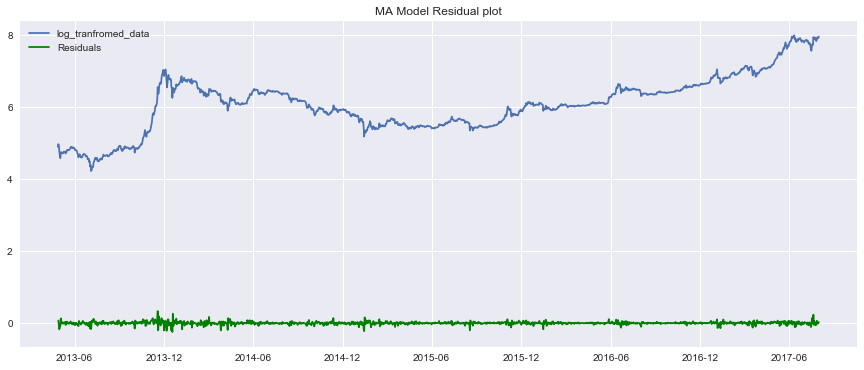

In [333]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.000053
std         0.041911
min        -0.246817
25%        -0.013552
50%         0.000411
75%         0.015719
max         0.332676
dtype: float64


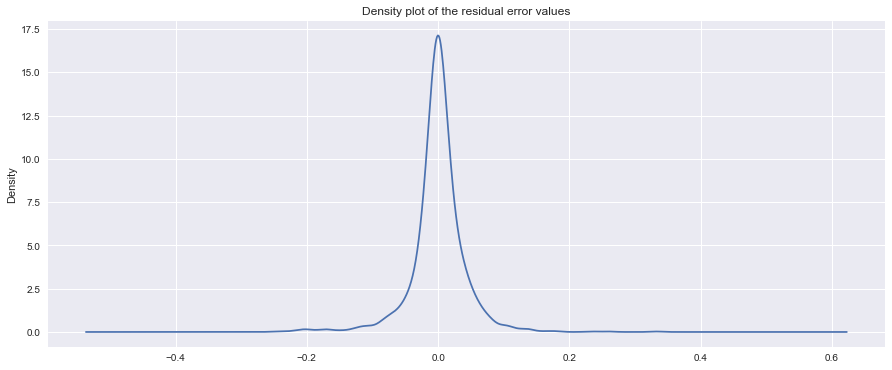

In [334]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

In [335]:
#ARIMA Combined model

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


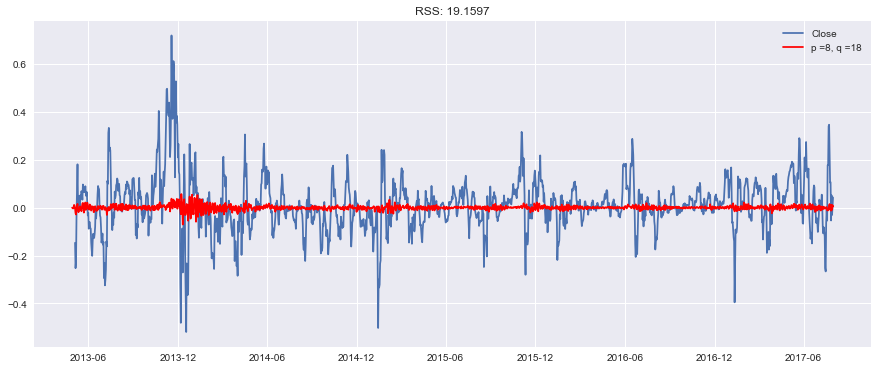

In [336]:
model = ARIMA(ts_logtransformed, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

In [337]:
results_ARIMA.summary()

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1390: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(8, 1, 18)   Log Likelihood                2740.109
Method:                       css-mle   S.D. of innovations              0.042
Date:                Sun, 07 Jan 2018   AIC                          -5426.219
Time:                        11:36:07   BIC                          -5281.790
Sample:                    04-29-2013   HQIC                         -5372.511
                         - 07-31-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
ar.L1.D.Close     -0.7054        nan        nan        nan           nan       nan
ar.L2.D.Close     -0.7170        nan        nan        nan           nan       nan
ar.L3.D.Close     -1.3306      0.149     -8.921      0.000        -1.623    -1.038
ar.L4.D.Close     -0.3443        nan        nan        nan           nan       nan
ar.L5.D.Close     -0.1090      0.276     -0.395      0.693        -0.650     0.432
ar.L6.D.Close     -0.2144      0.185     -1.159      0.246        -0.577     0.148
ar.L7.D.Close      0.3609        nan        nan        nan           nan       nan
ar.L8.D.Close      0.0520        nan        nan        nan           nan       nan
ma.L1.D.Close      0.7032        nan        nan        nan           nan       nan
ma.L2.D.Close      0.6771        nan        nan        nan           nan       nan
ma.L3.D.Close      1.3022      0.163      7.998      0.000         0.983     1.621
ma.L4.D.Close      0.3737        nan        nan        nan           nan       nan
ma.L5.D.Close      0.1202      0.252      0.477      0.633        -0.373     0.614
ma.L6.D.Close      0.3260      0.203      1.608      0.108        -0.071     0.723
ma.L7.D.Close     -0.2375        nan        nan        nan           nan       nan
ma.L8.D.Close      0.0311      0.070      0.442      0.659        -0.107     0.169
ma.L9.D.Close      0.1016      0.049      2.071      0.038         0.005     0.198
ma.L10.D.Close     0.0577      0.042      1.379      0.168        -0.024     0.140
ma.L11.D.Close     0.0709      0.060      1.188      0.235        -0.046     0.188
ma.L12.D.Close     0.0675      0.054      1.249      0.212        -0.038     0.173
ma.L13.D.Close     0.1135      0.055      2.071      0.039         0.006     0.221
ma.L14.D.Close     0.1530      0.041      3.687      0.000         0.072     0.234
ma.L15.D.Close     0.0986        nan        nan        nan           nan       nan
ma.L16.D.Close     0.1337      0.036      3.665      0.000         0.062     0.205
ma.L17.D.Close     0.0951        nan        nan        nan           nan       nan
ma.L18.D.Close     0.0593        nan        nan        nan           nan       nan
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9948           -0.2695j            1.0306           -0.4579
AR.2            -0.9948           +0.2695j            1.0306            0.4579
AR.3             0.3741           -0.9483j            1.0194           -0.1902
AR.4             0.3741           +0.9483j            1.0194            0.1902
AR.5             0.0070           -1.1547j            1.1547           -0.2490
AR.6             0.0070           +1.1547j            1.1547            0.2490
AR.7             1.7505           -0.0000j  

In [342]:
def evaluate_arima_model(data_set, arima_order): 
    model = ARIMA(data_set, order=arima_order) 
    results_ARIMA = model.fit(disp=-1) 
    RSS_diff = results_ARIMA.fittedvalues-ts_diff_logtrans 
    RSS = RSS_diff**2 
    return RSS 
def evaluate_models(dataset, p_values, d_values): 
     best_score, best_cfg = float("inf"), None 
     for p in p_values: 
        for d in d_values: 
            order = (p,d,18) 
            try: 
                rss = evaluate_arima_model(dataset, order) 
                if rss < best_score: 
                    best_score, best_cfg = rss, order 
                    print('ARIMA%s RSS=%.3f' % (order,rss)) 
            except: 
                continue 
                print('Best ARIMA%s RSS=%.3f' % (best_cfg, best_score)) 
                p_values = range(8,20,3) 
                d_values = range(0,3) 
                warnings.filterwarnings('ignore') 
                evaluate_models(ts_logtransformed,p_values,d_values)

In [193]:
results_ARIMA.fittedvaluespredictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30    0.000297
2013-05-01   -0.003259
2013-05-02   -0.000624
2013-05-03    0.011924
2013-05-04    0.008166
2013-05-05   -0.002078
2013-05-06   -0.022822
2013-05-07   -0.028197
2013-05-08    0.000122
2013-05-09    0.008666
2013-05-10    0.016302
2013-05-11   -0.009041
2013-05-12   -0.018610
2013-05-13   -0.012768
2013-05-14   -0.001760
2013-05-15    0.005980
2013-05-16   -0.003416
2013-05-17   -0.006046
2013-05-18   -0.014547
2013-05-19    0.004461
2013-05-20    0.017197
2013-05-21    0.020318
2013-05-22   -0.001736
2013-05-23   -0.020378
2013-05-24    0.000578
2013-05-25    0.010024
2013-05-26    0.022046
2013-05-27   -0.009281
2013-05-28   -0.005803
                ...   
2017-07-02   -0.004544
2017-07-03    0.010163
2017-07-04   -0.007500
2017-07-05    0.002769
2017-07-06   -0.011563
2017-07-07    0.005309
2017-07-08    0.001777
2017-07-09    0.004038
2017-07-10   -0.006945
2017-07-11   -0.002539
2017-07-12    0.004568
2017-07-13    0.001589
2017-0

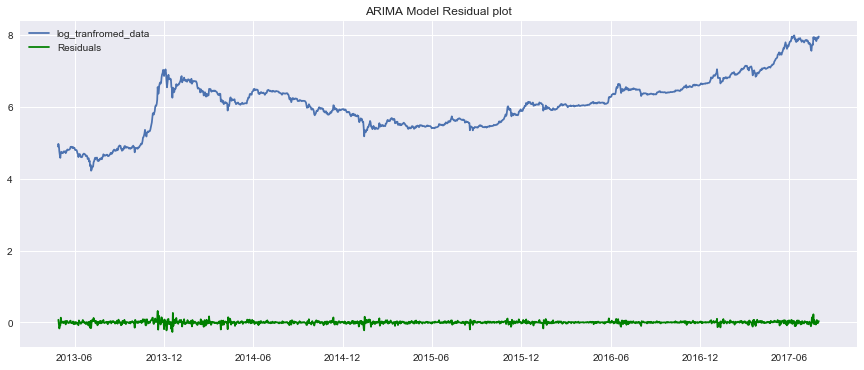

In [174]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.001534
std         0.041544
min        -0.266224
25%        -0.012410
50%         0.001849
75%         0.017898
max         0.319421
dtype: float64


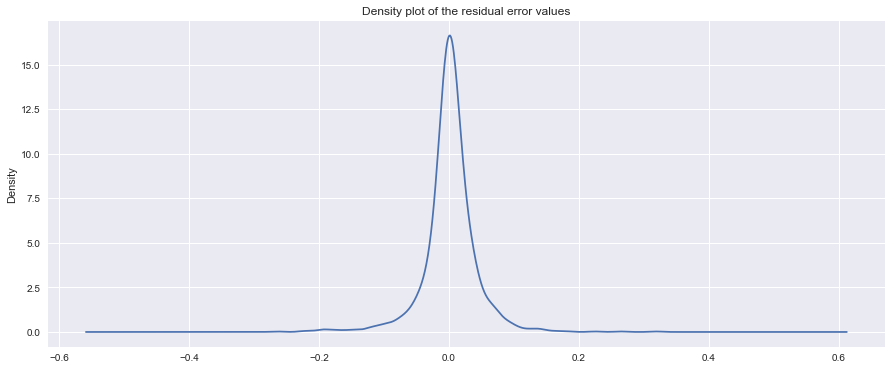

In [175]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [401]:
test=pd.read_csv("D:/Bitcoin/bitcoin_price_1week_Test - Test.csv",index_col="Date")

In [403]:
test.index=pd.to_datetime(test.index)

In [404]:
test.index

DatetimeIndex(['2017-08-07', '2017-08-06', '2017-08-05', '2017-08-04',
               '2017-08-03', '2017-08-02', '2017-08-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [405]:
test=test.Close

In [406]:
test=test.sort_index()

In [407]:
test

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

In [192]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-04-29    0.000000
2013-04-30    0.000297
2013-05-01   -0.003259
2013-05-02   -0.000624
2013-05-03    0.011924
dtype: float64


In [194]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30    0.000297
2013-05-01   -0.002962
2013-05-02   -0.003586
2013-05-03    0.008338
dtype: float64


In [195]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899703
2013-05-01    4.896444
2013-05-02    4.895820
dtype: float64

In [343]:
pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899406
2013-05-01    4.899406
2013-05-02    4.899406
2013-05-03    4.899406
2013-05-04    4.899406
2013-05-05    4.899406
2013-05-06    4.899406
2013-05-07    4.899406
2013-05-08    4.899406
2013-05-09    4.899406
2013-05-10    4.899406
2013-05-11    4.899406
2013-05-12    4.899406
2013-05-13    4.899406
2013-05-14    4.899406
2013-05-15    4.899406
2013-05-16    4.899406
2013-05-17    4.899406
2013-05-18    4.899406
2013-05-19    4.899406
2013-05-20    4.899406
2013-05-21    4.899406
2013-05-22    4.899406
2013-05-23    4.899406
2013-05-24    4.899406
2013-05-25    4.899406
2013-05-26    4.899406
2013-05-27    4.899406
                ...   
2017-07-02    4.899406
2017-07-03    4.899406
2017-07-04    4.899406
2017-07-05    4.899406
2017-07-06    4.899406
2017-07-07    4.899406
2017-07-08    4.899406
2017-07-09    4.899406
2017-07-10    4.899406
2017-07-11    4.899406
2017-07-12    4.899406
2017-07-13    4.899406
2017-0

In [211]:
from sklearn.metrics import mean_squared_error

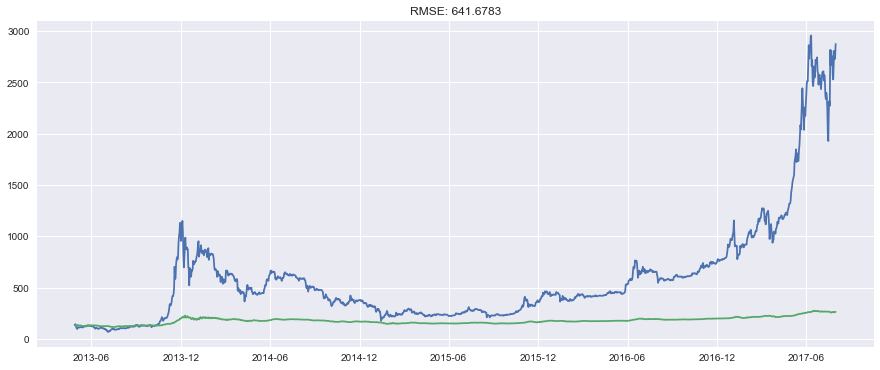

In [344]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data1)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data1)**2)/len(data1)))

In [352]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]
forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2869.744896
2017-08-02    2937.217053
2017-08-03    2987.453286
2017-08-04    3015.557849
2017-08-05    2953.509082
2017-08-06    2948.061778
2017-08-07    2982.229401
dtype: float64
Test MSE: 81258.974


In [347]:
pd.Series(results_ARIMA.forecast(steps=7)[0],dates)

2017-08-01    7.961978
2017-08-02    7.985218
2017-08-03    8.002177
2017-08-04    8.011540
2017-08-05    7.990749
2017-08-06    7.988903
2017-08-07    8.000426
dtype: float64

In [355]:
forecast.isnull().sum()

0

In [356]:
np.sqrt(sum((forecast-test)**2)/len(data1))

nan

In [361]:
forecast.head()

2017-08-01    2869.744896
2017-08-02    2937.217053
2017-08-03    2987.453286
2017-08-04    3015.557849
2017-08-05    2953.509082
dtype: float64

In [362]:
test.head()

1970-01-01 00:00:00.000000000    3378.94
1970-01-01 00:00:00.000000001    3213.94
1970-01-01 00:00:00.000000002    3252.91
1970-01-01 00:00:00.000000003    2895.89
1970-01-01 00:00:00.000000004    2804.73
Name: Close, dtype: float64

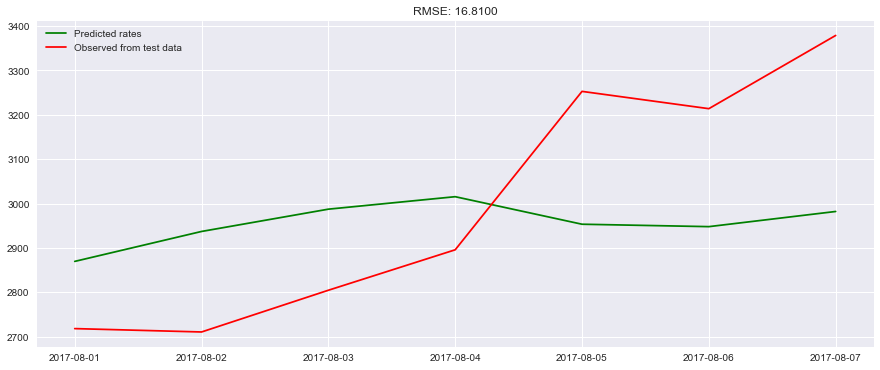

In [408]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data1)))
plt.legend(loc = 'best')

In [215]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Date
2013-04-29    0.001941
2013-04-30    0.001458
2013-05-01    0.000081
2013-05-02    0.002704
2013-05-03    0.013811
dtype: float64


In [205]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2013-04-29    0.001941
2013-04-30    0.003399
2013-05-01    0.003480
2013-05-02    0.006184
2013-05-03    0.019995
dtype: float64


In [206]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.901347
2013-04-30    4.902805
2013-05-01    4.902885
2013-05-02    4.905590
dtype: float64

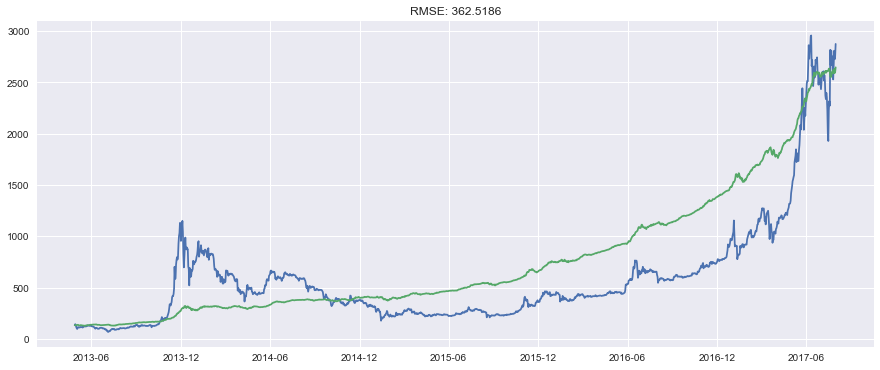

In [348]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(data1)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-data1)**2)/len(data1)))

In [350]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2873.760769
2017-08-02    2933.263173
2017-08-03    2985.844073
2017-08-04    3001.085326
2017-08-05    2982.756234
2017-08-06    3057.338005
2017-08-07    3063.277844
dtype: float64
Test MSE: 98183.594


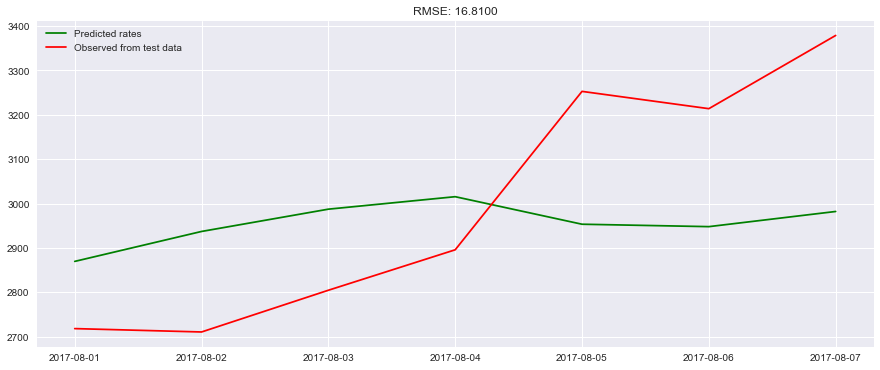

In [409]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data1)))
plt.legend(loc = 'best')

Date
2013-04-30    139.250000
2013-05-31    119.993226
2013-06-30    107.761333
2013-07-31     90.512258
2013-08-31    113.905161
2013-09-30    130.061667
2013-10-31    158.311935
2013-11-30    550.420667
2013-12-31    800.780968
2014-01-31    844.168387
2014-02-28    661.618214
2014-03-31    592.200323
2014-04-30    461.362000
Freq: M, Name: Close, dtype: float64


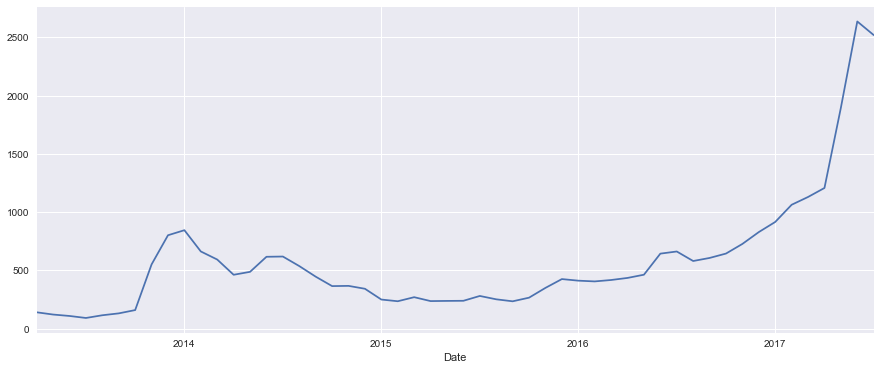

In [220]:
monthly_mean = data1.resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
monthly_mean.plot()